# Demo RNA Multi-Perceptrón Backpropagation para clasificar (atributo clase discreto) o estimar (atributo clase continuo)

In [4]:
%pip install tensorflow
%pip install tensorflow.keras.models
%pip install tensorflow.keras.utils
%pip install keras.utils
%pip install sklearn.model_selection
%pip install sklearn.preprocessing
%pip install matplotlib
%pip install pandas
%pip install numpy


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow.keras.models (from versions: none)
ERROR: No matching distribution found for tensorflow.keras.models


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow.keras.utils (from versions: none)
ERROR: No matching distribution found for tensorflow.keras.utils


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn.model_selection (from versions: none)
ERROR: No matching distribution found for sklearn.model_selection



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#@title Librerías a usar
from tensorflow import keras
#from tensorflow.keras.models import Model
#from tensorflow.keras.utils import plot_model
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import tensorflow as tf
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import math

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import os
import csv

import ipywidgets as widgets
from ipywidgets import Box, Layout
from IPython.display import clear_output
import random

from model.loader import CustomDataset
from model.model import Model
from model.trainer import train_model
from torch.utils.data import DataLoader
from analysis.logger import Logger
from model.LinearClamp import LinearClamp
from model.metrics import evaluar_modelo
from analysis.data_split import stratified_split

import torch
import torch.optim as optim
import torch.nn as nn
import os 

print("Librerías cargadas")

Librerías cargadas


## Pre-procesamiento de datos

In [6]:
!wget https://raw.githubusercontent.com/juanfra18/TP-IAA/main/datos/Resilience_CleanOnly_v1.csv -O Resilience_CleanOnly_v1.csv

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [7]:
original_data = pd.read_csv('datos/Resilience_CleanOnly_v1.csv', encoding='cp1252', delimiter=',')
original_data.head()

,ppt_internal_id,Dataset,r8.2_who5_num,r8.2_who5_fct4,r8.2_who5_Iexcel,age_fct6,gender_fct2,eth_fct4,education_qual,r4_previnworkforce_fct3,...,r8.16_2_fct2,r8.16_3_fct2,r8.16_6_fct2,r8.16_4_fct2,r12.1_11_fct2,r12.1_13_fct2,r6.4_fct2,r6.5_fct2,r6_change_fct3,postweight_unscaled
0,1,Dynata,13,Good,Other,15-24,Male,European/Other^,High school,Employed,...,No,No,No,No,No,Yes,Low level,Low level,Increase,3402.795918
1,2,Dynata,21,Very good,Other,55-64,Male,European/Other^,Certificate or diploma,Retired,...,No,No,No,No,Yes,No,Hazardous level,Hazardous level,No change,2250.293478
2,3,Dynata,16,Good,Other,25-34,Female,Pacific,Bachelor or above,Employed,...,No,No,Yes,No,No,No,Low level,Low level,No change,1659.857143
3,4,Dynata,4,Poor,Other,45-54,Female,European/Other^,Bachelor or above,Employed,...,Yes,No,No,Yes,Yes,No,Low level,Low level,Increase,2132.097087
4,5,Dynata,7,Poor,Other,15-24,Female,European/Other^,Certificate or diploma,Employed,...,Yes,Yes,Yes,Yes,Yes,Yes,Low level,Low level,Increase,2008.063291


In [8]:
original_data

,ppt_internal_id,Dataset,r8.2_who5_num,r8.2_who5_fct4,r8.2_who5_Iexcel,age_fct6,gender_fct2,eth_fct4,education_qual,r4_previnworkforce_fct3,...,r8.16_2_fct2,r8.16_3_fct2,r8.16_6_fct2,r8.16_4_fct2,r12.1_11_fct2,r12.1_13_fct2,r6.4_fct2,r6.5_fct2,r6_change_fct3,postweight_unscaled
0,1,Dynata,13,Good,Other,15-24,Male,European/Other^,High school,Employed,...,No,No,No,No,No,Yes,Low level,Low level,Increase,3402.795918
1,2,Dynata,21,Very good,Other,55-64,Male,European/Other^,Certificate or diploma,Retired,...,No,No,No,No,Yes,No,Hazardous level,Hazardous level,No change,2250.293478
2,3,Dynata,16,Good,Other,25-34,Female,Pacific,Bachelor or above,Employed,...,No,No,Yes,No,No,No,Low level,Low level,No change,1659.857143
3,4,Dynata,4,Poor,Other,45-54,Female,European/Other^,Bachelor or above,Employed,...,Yes,No,No,Yes,Yes,No,Low level,Low level,Increase,2132.097087
4,5,Dynata,7,Poor,Other,15-24,Female,European/Other^,Certificate or diploma,Employed,...,Yes,Yes,Yes,Yes,Yes,Yes,Low level,Low level,Increase,2008.063291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3482,3483,Ministries,20,Very good,Other,65+,Female,Pacific,No formal qualification,Employed,...,No,No,No,Yes,Yes,Yes,Low level,Low level,No change,2661.000000
3483,3484,Ministries,6,Poor,Other,45-54,Male,Maori,No formal qualification,Employed,...,No,No,No,No,No,No,Low level,Low level,No change,2315.666667
3484,3485,Ministries,7,Poor,Other,25-34,Male,European/Other^,Certificate or diploma,Employed,...,No,Yes,No,Yes,Yes,Yes,Low level,Low level,No change,4053.000000
3485,3486,Ministries,10,Poor,Other,45-54,Female,European/Other^,High school,Employed,...,No,No,No,No,Yes,No,Low level,Low level,No change,1557.489362


In [9]:
original_data[['r3.3_fct5','r3.3_num']]
#Prefiero quedarme con r3.3_fct5 ya que es más facil luego encontrar patrones entre los datos si están categorizados y no tienen valores sueltos. sin embargo, la segunda variable no tiene valores nulos mientras que la primera si, asi q la transformo luego

#Quito r3.3_num, r8.2_who5_fct4, r8.2_who5_Iexcel, r3.3_num
#postweight_unscaled no es propiedad real del caso, tal vez pueden usarse como pesos para el entrenamiento¿?

,r3.3_fct5,r3.3_num
0,6-9,6
1,2,2
2,3-5,3
3,3-5,4
4,1,1
...,...,...
3482,2,2
3483,3-5,5
3484,3-5,3
3485,3-5,3


In [10]:
original_data[['postweight_unscaled']]

,postweight_unscaled
0,3402.795918
1,2250.293478
2,1659.857143
3,2132.097087
4,2008.063291
...,...
3482,2661.000000
3483,2315.666667
3484,4053.000000
3485,1557.489362


In [11]:
rename_col = {
    'r8.2_who5_num': 'target',

    'age_fct6': 'age_group',
    'gender_fct2': 'gender',
    'eth_fct4': 'ethnicity',
    'r4_previnworkforce_fct3': 'employment_pre_lockdown',
    'r4.5_fct3': 'work_type',
    'r7.1_fct3': 'smoking_status',
    'r5.2_fct2': 'self_rated_health',
    'r8.17_fct2': 'mental_health_diagnosis',
    'r5.10': 'physical_disability',
    'r9.1_fct2': 'trauma_exposure',
    'r3.2_fct4': 'bubble_type',
  # 'r3.3_fct5': 'bubble_size_cat',
    'r3.3_num': 'bubble_size_num',
    'r3.7_fct3': 'social_connection_freq',
    'r3.8': 'contact_change',
    'r4_lesswork_fct2': 'less_work',
    'r4_lostwork_fct2': 'lost_work',
    'r5.6_fct3': 'covid_exposure',
    'r3.4': 'bubble_satisfaction',
    'r3.10': 'bubble_relationships',
    'r3.11': 'loneliness',
    'r3.12': 'time_covid_info',
    'r8.16_1_fct2': 'stress_self_health',
    'r8.16_2_fct2': 'stress_family_health',
    'r8.16_3_fct2': 'stress_finances',
    'r8.16_6_fct2': 'stress_employment',
    'r8.16_4_fct2': 'stress_covid_conseq',
    'r12.1_11_fct2': 'positive_lockdown_personal',
    'r12.1_13_fct2': 'positive_lockdown_society',
    'r6.4_fct2': 'alcohol_pre',
    'r6.5_fct2': 'alcohol_during',
    'r6_change_fct3': 'alcohol_change',
}

In [12]:
data = original_data.copy()

In [13]:
data = data.drop(columns=['r3.3_fct5', 'r8.2_who5_fct4', 'r8.2_who5_Iexcel','postweight_unscaled','ppt_internal_id','Dataset'])

In [14]:
data = data.rename(columns = rename_col)

In [15]:
data.shape

(3487, 34)

# Missing values

## Total missing values

In [16]:
(data.isnull().sum().sort_values(ascending=False)/len(data))*100

lost_work                     45.081732
loneliness                    42.299971
less_work                     39.116719
work_type                     39.088041
bubble_relationships          15.256668
mental_health_diagnosis        2.208202
social_connection_freq         2.122168
gender                         0.630915
contact_change                 0.573559
positive_lockdown_personal     0.458847
positive_lockdown_society      0.458847
income_band                    0.401491
alcohol_change                 0.229424
alcohol_during                 0.200746
alcohol_pre                    0.143390
bubble_type                    0.114712
time_covid_info                0.086034
smoking_status                 0.086034
employment_pre_lockdown        0.028678
covid_exposure                 0.028678
age_group                      0.000000
target                         0.000000
education_qual                 0.000000
ethnicity                      0.000000
physical_disability            0.000000


In [17]:
data.isnull().sum().sort_values(ascending=False)

lost_work                     1572
loneliness                    1475
less_work                     1364
work_type                     1363
bubble_relationships           532
mental_health_diagnosis         77
social_connection_freq          74
gender                          22
contact_change                  20
positive_lockdown_personal      16
positive_lockdown_society       16
income_band                     14
alcohol_change                   8
alcohol_during                   7
alcohol_pre                      5
bubble_type                      4
time_covid_info                  3
smoking_status                   3
employment_pre_lockdown          1
covid_exposure                   1
age_group                        0
target                           0
education_qual                   0
ethnicity                        0
physical_disability              0
self_rated_health                0
bubble_size_num                  0
trauma_exposure                  0
bubble_satisfaction 

## target

In [18]:
data['target'].value_counts(dropna=False)

target
20    337
19    274
17    236
18    223
15    219
16    207
14    198
13    182
21    150
12    143
10    142
9     132
11    128
5     125
22    102
8      98
6      97
7      92
25     85
4      70
3      62
23     62
24     54
2      24
.      19
1      14
0      12
Name: count, dtype: int64

In [19]:
# Mantener solo valores numéricos <= 25 y distintos de '.'
col = pd.to_numeric(
    data['target'].astype(str).str.strip().replace({'.': np.nan, '': np.nan}),
    errors='coerce'
)
data = data[col.le(25)].copy()  # descarta NaN y >25
data['target'] = col.loc[data.index].astype('Int64')
data['target'].value_counts(dropna=False)

target
20    337
19    274
17    236
18    223
15    219
16    207
14    198
13    182
21    150
12    143
10    142
9     132
11    128
5     125
22    102
8      98
6      97
7      92
25     85
4      70
3      62
23     62
24     54
2      24
1      14
0      12
Name: count, dtype: Int64

## employment_pre_lockdown

In [20]:
table = 'employment_pre_lockdown'
data[table].value_counts(dropna=False)

employment_pre_lockdown
Employed      2230
Retired        661
Unemployed     576
NaN              1
Name: count, dtype: int64

In [21]:
most_common = data[table].value_counts(dropna=False).idxmax()
data[table] = np.where(data[table].isnull(), most_common, data[table])
data[table].value_counts(dropna=False)

employment_pre_lockdown
Employed      2231
Retired        661
Unemployed     576
Name: count, dtype: int64

## bubble_type

In [22]:
table = 'bubble_type'
data[table].value_counts(dropna=False)

bubble_type
With children        1149
With one adult       1103
With other adults     685
Live by myself        527
NaN                     4
Name: count, dtype: int64

In [23]:
most_common = data[table].value_counts(dropna=False).idxmax()
data[table] = np.where(data[table].isnull(), most_common, data[table])
data[table].value_counts(dropna=False)

bubble_type
With children        1153
With one adult       1103
With other adults     685
Live by myself        527
Name: count, dtype: int64

## lost_work

In [24]:
data['lost_work'].value_counts(dropna=False)

lost_work
Not lost work    1797
NaN              1559
Lost work         112
Name: count, dtype: int64

In [25]:
(data['employment_pre_lockdown']!='Employed').sum()
#Quienes directamente no tenían trabajo previo al COVID no pueden perderlo

np.int64(1237)

In [26]:
data['lost_work'] = np.where(data['lost_work'].isnull() & (data['employment_pre_lockdown']!='Employed'), 'Without work', data['lost_work'])
data['lost_work'].value_counts()

lost_work
Not lost work    1797
Without work     1237
Lost work         112
Name: count, dtype: int64

In [27]:
nulos = data['lost_work'].isnull().sum()
print('Porcentaje de nulos: ', (nulos/len(data))*100)
print('Cantidad de nulos: ', nulos)

Porcentaje de nulos:  9.284890426758938
Cantidad de nulos:  322


In [28]:
data['lost_work'] = np.where(data['lost_work'].isnull(), 'Not lost work', data['lost_work'])

## loneliness

In [29]:
data[['loneliness']].value_counts()
#Los nulos en realidad corresponden a la categoría 'none'

loneliness        
More than a little    1003
A little               996
Name: count, dtype: int64

In [30]:
data['loneliness'] = np.where(data['loneliness'].isnull(), 'None', data['loneliness'])
data[['loneliness']].value_counts()

loneliness        
None                  1469
More than a little    1003
A little               996
Name: count, dtype: int64

## less_work

In [31]:
#Caso similar a lost_work

In [32]:
data['less_work'].value_counts()

less_work
Not less work    1348
Less work         769
Name: count, dtype: int64

In [33]:
data['less_work'] = np.where(data['less_work'].isnull() & (data['employment_pre_lockdown']!='Employed'), 'Without work', data['less_work'])
data['less_work'].value_counts()

less_work
Not less work    1348
Without work     1237
Less work         769
Name: count, dtype: int64

In [34]:
nulos = data['less_work'].isnull().sum()
print('Porcentaje de nulos: ', (nulos/len(data))*100)
print('Cantidad de nulos: ', nulos)

Porcentaje de nulos:  3.2871972318339098
Cantidad de nulos:  114


In [35]:
data['less_work'] = np.where(data['less_work'].isnull(), 'Not less work', data['less_work'])

## work_type


In [36]:
data['work_type'].value_counts(dropna=False)

work_type
Not essential worker    1395
NaN                     1350
Yes essential worker     723
Name: count, dtype: int64

In [37]:
data['work_type'] = np.where(data['work_type'].isnull() & (data['employment_pre_lockdown']!='Employed'), 'Without work', data['work_type'])
data['work_type'].value_counts(dropna=False)

work_type
Not essential worker    1395
Without work            1237
Yes essential worker     723
NaN                      113
Name: count, dtype: int64

In [38]:
nulos = data['work_type'].isnull().sum()
print('Porcentaje de nulos: ', (nulos/len(data))*100)
print('Cantidad de nulos: ', nulos)

Porcentaje de nulos:  3.2583621683967703
Cantidad de nulos:  113


In [39]:
data['work_type'] = np.where(data['work_type'].isnull(), 'Not essential worker', data['work_type'])

In [40]:
data['work_type'].value_counts(dropna=False)

work_type
Not essential worker    1508
Without work            1237
Yes essential worker     723
Name: count, dtype: int64

## bubble_size_num
Hago que sea 0 cuando no tiene bubble

In [41]:
data['bubble_size_num'].value_counts(dropna=False)

bubble_size_num
2      1176
3       617
4       574
1       527
5       320
6       118
7        56
8        26
9        15
.         9
10        8
12        5
13        4
11        4
25        1
14        1
19        1
40        1
21        1
45        1
999       1
15        1
70        1
Name: count, dtype: int64

In [42]:
# Mantener solo valores numéricos <= 50 y distintos de '.'
col = pd.to_numeric(
    data['bubble_size_num'].astype(str).str.strip().replace({'.': np.nan, '': np.nan}),
    errors='coerce'
)
data = data[col.le(50)].copy()  # descarta NaN y >50
data['bubble_size_num'] = col.loc[data.index].astype('Int64')
data['bubble_size_num'].value_counts(dropna=False)

bubble_size_num
2     1176
3      617
4      574
1      527
5      320
6      118
7       56
8       26
9       15
10       8
12       5
13       4
11       4
25       1
14       1
19       1
40       1
21       1
45       1
15       1
Name: count, dtype: Int64

## bubble_relationships

In [43]:
data['bubble_relationships'].value_counts(dropna=False)

bubble_relationships
Very well    1335
Well         1114
NaN           528
Not well      480
Name: count, dtype: int64

In [44]:
# Aquellos que viven solos no van a tener asociado bubble_relationships
len(data[data['bubble_relationships'].isnull() & (data['bubble_type']=='Live by myself')])

527

In [45]:
data['bubble_relationships'] = np.where(data['bubble_relationships'].isnull() & (data['bubble_type']=='Live by myself'), 'Without bubble', data['bubble_relationships'])
data['bubble_relationships'].value_counts(dropna=False)

bubble_relationships
Very well         1335
Well              1114
Without bubble     527
Not well           480
NaN                  1
Name: count, dtype: int64

In [46]:
data['bubble_relationships'] = np.where(data['bubble_relationships'].isnull(), 'Very well', data['bubble_relationships'])
data['bubble_relationships'].value_counts(dropna=False)

bubble_relationships
Very well         1336
Well              1114
Without bubble     527
Not well           480
Name: count, dtype: int64

## mental_health_diagnosis


In [47]:
data['mental_health_diagnosis'].value_counts(dropna=False)

mental_health_diagnosis
No                    2755
Yes past diagnosis     627
NaN                     75
Name: count, dtype: int64

In [48]:
nulos = data['mental_health_diagnosis'].isnull().sum()
print('Porcentaje de nulos: ', (nulos/len(data))*100)
print('Cantidad de nulos: ', nulos)

Porcentaje de nulos:  2.169511136823836
Cantidad de nulos:  75


In [49]:
data['mental_health_diagnosis'] = np.where(data['mental_health_diagnosis'].isnull(), 'No', data['mental_health_diagnosis'])
data['mental_health_diagnosis'].value_counts(dropna=False)

mental_health_diagnosis
No                    2830
Yes past diagnosis     627
Name: count, dtype: int64

## social_connection_freq


In [50]:
data['social_connection_freq'].value_counts(dropna=False)

social_connection_freq
High      1995
Medium     944
Low        447
NaN         71
Name: count, dtype: int64

In [51]:
nulos = data['social_connection_freq'].isnull().sum()
print('Porcentaje de nulos: ', (nulos/len(data))*100)
print('Cantidad de nulos: ', nulos)

Porcentaje de nulos:  2.053803876193231
Cantidad de nulos:  71


In [52]:
data['social_connection_freq'] = np.where(data['social_connection_freq'].isnull(), 'High', data['social_connection_freq'])
data['social_connection_freq'].value_counts(dropna=False)

social_connection_freq
High      2066
Medium     944
Low        447
Name: count, dtype: int64

## gender


In [53]:
data['gender'].value_counts(dropna=False)

gender
Female    1961
Male      1474
NaN         22
Name: count, dtype: int64

In [54]:
data['gender'] = np.where(data['gender'].isnull(), 'Female', data['gender'])
data['gender'].value_counts(dropna=False)

gender
Female    1983
Male      1474
Name: count, dtype: int64

## contact_change


In [55]:
data['contact_change'].value_counts(dropna=False)

contact_change
It has stayed the same    1231
It has increased          1117
It has decreased          1091
NaN                         18
Name: count, dtype: int64

In [56]:
data['contact_change'] = np.where(data['contact_change'].isnull(), 'It has stayed the same', data['contact_change'])
data['contact_change'].value_counts(dropna=False)

contact_change
It has stayed the same    1249
It has increased          1117
It has decreased          1091
Name: count, dtype: int64

## positive_lockdown_personal


In [57]:
data['positive_lockdown_personal'].value_counts(dropna=False)

positive_lockdown_personal
No     1741
Yes    1700
NaN      16
Name: count, dtype: int64

In [58]:
data['positive_lockdown_personal'] = np.where(data['positive_lockdown_personal'].isnull(), 'No', data['positive_lockdown_personal'])
data['positive_lockdown_personal'].value_counts(dropna=False)

positive_lockdown_personal
No     1757
Yes    1700
Name: count, dtype: int64

## positive_lockdown_society


In [59]:
data['positive_lockdown_society'].value_counts(dropna=False)

positive_lockdown_society
No     2003
Yes    1438
NaN      16
Name: count, dtype: int64

In [60]:
data['positive_lockdown_society'] = np.where(data['positive_lockdown_society'].isnull(), 'No', data['positive_lockdown_society'])
data['positive_lockdown_society'].value_counts(dropna=False)

positive_lockdown_society
No     2019
Yes    1438
Name: count, dtype: int64

## income_band


In [61]:
data['income_band'].value_counts(dropna=False)

income_band
$30,001– $70,000       1173
$30,000 or less        1114
$70,001 – $100,000      432
Prefer not to say       360
$100,001 – $150,000     238
$150,001 or more        126
NaN                      14
Name: count, dtype: int64

In [62]:
most_common = data['income_band'].value_counts(dropna=False).idxmax()
data['income_band'] = np.where(data['income_band'].isnull(), most_common, data['income_band'])
data['income_band'].value_counts(dropna=False)

income_band
$30,001– $70,000       1187
$30,000 or less        1114
$70,001 – $100,000      432
Prefer not to say       360
$100,001 – $150,000     238
$150,001 or more        126
Name: count, dtype: int64

## alcohol_change


In [63]:
data['alcohol_change'].value_counts(dropna=False)

alcohol_change
No change    1976
Increase      870
Decrease      603
NaN             8
Name: count, dtype: int64

In [64]:
data['alcohol_change'] = np.where(data['alcohol_change'].isnull(), 'No change', data['alcohol_change'])
data['alcohol_change'].value_counts(dropna=False)

alcohol_change
No change    1984
Increase      870
Decrease      603
Name: count, dtype: int64

## alcohol_during

In [65]:
data['alcohol_during'].value_counts(dropna=False)

alcohol_during
Low level          3017
Hazardous level     433
NaN                   7
Name: count, dtype: int64

In [66]:
data['alcohol_during'] = np.where(data['alcohol_during'].isnull(), 'Low level', data['alcohol_during'])
data['alcohol_during'].value_counts(dropna=False)

alcohol_during
Low level          3024
Hazardous level     433
Name: count, dtype: int64

## alcohol_pre

In [67]:
table = 'alcohol_pre'
data[table].value_counts(dropna=False)

alcohol_pre
Low level          3103
Hazardous level     349
NaN                   5
Name: count, dtype: int64

In [68]:
most_common = data[table].value_counts(dropna=False).idxmax()
data[table] = np.where(data[table].isnull(), most_common, data[table])
data[table].value_counts(dropna=False)

alcohol_pre
Low level          3108
Hazardous level     349
Name: count, dtype: int64

## time_covid_info

In [69]:
table = 'time_covid_info'
data[table].value_counts(dropna=False)

time_covid_info
Less than 2 hours    2975
Two plus hours        479
NaN                     3
Name: count, dtype: int64

In [70]:
most_common = data[table].value_counts(dropna=False).idxmax()
data[table] = np.where(data[table].isnull(), most_common, data[table])
data[table].value_counts(dropna=False)

time_covid_info
Less than 2 hours    2978
Two plus hours        479
Name: count, dtype: int64

## smoking_status

In [71]:
table = 'smoking_status'
data[table].value_counts(dropna=False)

smoking_status
Never      1868
Past       1043
Current     543
NaN           3
Name: count, dtype: int64

In [72]:
most_common = data[table].value_counts(dropna=False).idxmax()
data[table] = np.where(data[table].isnull(), most_common, data[table])
data[table].value_counts(dropna=False)

smoking_status
Never      1871
Past       1043
Current     543
Name: count, dtype: int64

## covid_exposure

In [73]:
table = 'covid_exposure'
data[table].value_counts(dropna=False)

covid_exposure
No           3299
Tested        119
Suspected      28
Confirmed      10
NaN             1
Name: count, dtype: int64

In [74]:
most_common = data[table].value_counts(dropna=False).idxmax()
data[table] = np.where(data[table].isnull(), most_common, data[table])
data[table].value_counts(dropna=False)

covid_exposure
No           3300
Tested        119
Suspected      28
Confirmed      10
Name: count, dtype: int64

In [75]:
data.isnull().sum().sort_values(ascending=False)

target                        0
age_group                     0
gender                        0
ethnicity                     0
education_qual                0
employment_pre_lockdown       0
work_type                     0
smoking_status                0
income_band                   0
self_rated_health             0
mental_health_diagnosis       0
physical_disability           0
trauma_exposure               0
bubble_type                   0
bubble_size_num               0
social_connection_freq        0
contact_change                0
less_work                     0
lost_work                     0
covid_exposure                0
bubble_satisfaction           0
bubble_relationships          0
loneliness                    0
time_covid_info               0
stress_self_health            0
stress_family_health          0
stress_finances               0
stress_employment             0
stress_covid_conseq           0
positive_lockdown_personal    0
positive_lockdown_society     0
alcohol_

In [76]:
data

,target,age_group,gender,ethnicity,education_qual,employment_pre_lockdown,work_type,smoking_status,income_band,self_rated_health,...,stress_self_health,stress_family_health,stress_finances,stress_employment,stress_covid_conseq,positive_lockdown_personal,positive_lockdown_society,alcohol_pre,alcohol_during,alcohol_change
0,13,15-24,Male,European/Other^,High school,Employed,Yes essential worker,Never,"$30,000 or less",Good or better,...,No,No,No,No,No,No,Yes,Low level,Low level,Increase
1,21,55-64,Male,European/Other^,Certificate or diploma,Retired,Without work,Never,"$70,001 – $100,000",Good or better,...,Yes,No,No,No,No,Yes,No,Hazardous level,Hazardous level,No change
2,16,25-34,Female,Pacific,Bachelor or above,Employed,Yes essential worker,Current,"$30,001– $70,000",Poor or Fair,...,No,No,No,Yes,No,No,No,Low level,Low level,No change
3,4,45-54,Female,European/Other^,Bachelor or above,Employed,Yes essential worker,Never,"$30,000 or less",Good or better,...,No,Yes,No,No,Yes,Yes,No,Low level,Low level,Increase
4,7,15-24,Female,European/Other^,Certificate or diploma,Employed,Not essential worker,Past,"$30,001– $70,000",Good or better,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Low level,Low level,Increase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3482,20,65+,Female,Pacific,No formal qualification,Employed,Not essential worker,Past,"$100,001 – $150,000",Good or better,...,No,No,No,No,Yes,Yes,Yes,Low level,Low level,No change
3483,6,45-54,Male,Maori,No formal qualification,Employed,Yes essential worker,Past,"$70,001 – $100,000",Good or better,...,No,No,No,No,No,No,No,Low level,Low level,No change
3484,7,25-34,Male,European/Other^,Certificate or diploma,Employed,Not essential worker,Never,"$30,001– $70,000",Good or better,...,No,No,Yes,No,Yes,Yes,Yes,Low level,Low level,No change
3485,10,45-54,Female,European/Other^,High school,Employed,Not essential worker,Never,"$70,001 – $100,000",Good or better,...,No,No,No,No,No,Yes,No,Low level,Low level,No change


# Normalización de datos:

In [77]:
data.head()

,target,age_group,gender,ethnicity,education_qual,employment_pre_lockdown,work_type,smoking_status,income_band,self_rated_health,...,stress_self_health,stress_family_health,stress_finances,stress_employment,stress_covid_conseq,positive_lockdown_personal,positive_lockdown_society,alcohol_pre,alcohol_during,alcohol_change
0,13,15-24,Male,European/Other^,High school,Employed,Yes essential worker,Never,"$30,000 or less",Good or better,...,No,No,No,No,No,No,Yes,Low level,Low level,Increase
1,21,55-64,Male,European/Other^,Certificate or diploma,Retired,Without work,Never,"$70,001 – $100,000",Good or better,...,Yes,No,No,No,No,Yes,No,Hazardous level,Hazardous level,No change
2,16,25-34,Female,Pacific,Bachelor or above,Employed,Yes essential worker,Current,"$30,001– $70,000",Poor or Fair,...,No,No,No,Yes,No,No,No,Low level,Low level,No change
3,4,45-54,Female,European/Other^,Bachelor or above,Employed,Yes essential worker,Never,"$30,000 or less",Good or better,...,No,Yes,No,No,Yes,Yes,No,Low level,Low level,Increase
4,7,15-24,Female,European/Other^,Certificate or diploma,Employed,Not essential worker,Past,"$30,001– $70,000",Good or better,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Low level,Low level,Increase


In [78]:
# Primero paso las columnas categóricas a números
mapping = {
        "age_group": {
            "15-24": 0,
            "25-34": 1,
            "35-44": 2,
            "45-54": 3,
            "55-64": 4,
            "65+": 5
        },
        "gender": {
            "Male": 0,
            "Female": 1
        },
        "ethnicity": {
            "European/Other^": 0,
            "Maori": 1,
            "Pacific": 2,
            "Asian": 3
        },
        "education_qual": {
            "No formal qualification": 0,
            "High school": 1,
            "Certificate or diploma": 2,
            "Bachelor or above": 3
        },
        "employment_pre_lockdown": {
            "Employed": 0,
            "Unemployed": 1,
            "Retired": 2
        },
        "work_type": {
            "Not essential worker": 0,
            "Yes essential worker": 1,
            "Without work": 2
        },
        "smoking_status": {
            "Never": 0,
            "Past": 1,
            "Current": 2
        },
        "income_band": {
            "$30,000 or less": 0,
            "$30,001– $70,000": 1,
            "$70,001 – $100,000": 2,
            "$100,001 – $150,000": 3,
            "$150,001 or more": 4,
            "Prefer not to say": 5
        },
        "self_rated_health": {
            "Poor or Fair": 0,
            "Good or better": 1
        },
        "mental_health_diagnosis": {
            "No": 0,
            "Yes past diagnosis": 1
        },
        "physical_disability": {
            "No": 0,
            "Yes": 1
        },
        "trauma_exposure": {
            "No": 0,
            "Yes": 1
        },
        "bubble_type": {
            "Live by myself": 0,
            "With one adult": 1,
            "With other adults": 2,
            "With children": 3
        },
        "social_connection_freq": {
            "High": 2,
            "Medium": 1,
            "Low": 0
        },
        "contact_change": {
            "It has stayed the same": 0,
            "It has increased": 1,
            "It has decreased": 2
        },
        "less_work": {
            "Not less work": 0,
            "Less work": 1,
            "Without work": 2
        },
        "lost_work": {
            "Not lost work": 0,
            "Lost work": 1,
            "Without work": 2
        },
        "covid_exposure": {
            "No": 0,
            "Suspected": 1,
            "Tested": 2,
            "Confirmed": 3
        },
        "bubble_satisfaction": {
            "Not satifisfied": 0,
            "Satisfied": 1,
            "Extremely satisfied": 2
        },
        "bubble_relationships": {
            "Not well": 0,
            "Well": 1,
            "Very well": 2,
            "Without bubble": 3
        },
        "loneliness": {
            "None": 0,
            "A little": 1,
            "More than a little": 2
        },
        "time_covid_info": {
            "Less than 2 hours": 0,
            "Two plus hours": 1
        },
        "stress_self_health": {
            "No": 0,
            "Yes": 1
        },
        "stress_family_health": {
            "No": 0,
            "Yes": 1
        },
        "stress_finances": {
            "No": 0,
            "Yes": 1
        },
        "stress_employment": {
            "No": 0,
            "Yes": 1
        },
        "stress_covid_conseq": {
            "No": 0,
            "Yes": 1
        },
        "positive_lockdown_personal": {
            "No": 0,
            "Yes": 1
        },
        "positive_lockdown_society": {
            "No": 0,
            "Yes": 1
        },
        "alcohol_pre": {
            "Low level": 0,
            "Hazardous level": 1
        },
        "alcohol_during": {
            "Low level": 0,
            "Hazardous level": 1
        },
        "alcohol_change": {
            "No change": 2,
            "Increase": 1,
            "Decrease": 0
        }
}

In [79]:
data_encoded = data.copy()

# 1) Reemplaza
data_encoded = data_encoded.replace(mapping)

# 2) Fuerza tipo numérico en las columnas mapeadas
for col, m in mapping.items():
    if col not in data_encoded.columns:
        continue
    if isinstance(m, dict) and len(m) == 0:
        # casos numéricos no codificados
        data_encoded[col] = pd.to_numeric(data_encoded[col], errors="coerce")
    elif isinstance(m, dict) and len(m) > 0:
        # columnas categóricas codificadas -> a enteros con soporte de NaN
        data_encoded[col] = pd.to_numeric(data_encoded[col], errors="coerce").astype("Int64")

# 3) (Opcional) chequeo de valores no mapeados
unmapped_report = {}
for col, m in mapping.items():
    if col in data.columns and isinstance(m, dict) and len(m) > 0:
        mask_unmapped = data[col].notna() & ~data[col].isin(m.keys())
        if mask_unmapped.any():
            unmapped_report[col] = sorted(data.loc[mask_unmapped, col].unique().tolist())

if unmapped_report:
    print("Categorías no mapeadas detectadas:", unmapped_report)

C:\Users\iaram\AppData\Local\Temp\ipykernel_13452\940831558.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded = data_encoded.replace(mapping)


In [80]:
data_encoded

,target,age_group,gender,ethnicity,education_qual,employment_pre_lockdown,work_type,smoking_status,income_band,self_rated_health,...,stress_self_health,stress_family_health,stress_finances,stress_employment,stress_covid_conseq,positive_lockdown_personal,positive_lockdown_society,alcohol_pre,alcohol_during,alcohol_change
0,13,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,21,4,0,0,2,2,2,0,2,1,...,1,0,0,0,0,1,0,1,1,2
2,16,1,1,2,3,0,1,2,1,0,...,0,0,0,1,0,0,0,0,0,2
3,4,3,1,0,3,0,1,0,0,1,...,0,1,0,0,1,1,0,0,0,1
4,7,0,1,0,2,0,0,1,1,1,...,1,1,1,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3482,20,5,1,2,0,0,0,1,3,1,...,0,0,0,0,1,1,1,0,0,2
3483,6,3,0,1,0,0,1,1,2,1,...,0,0,0,0,0,0,0,0,0,2
3484,7,1,0,0,2,0,0,0,1,1,...,0,0,1,0,1,1,1,0,0,2
3485,10,3,1,0,1,0,0,0,2,1,...,0,0,0,0,0,1,0,0,0,2


In [81]:
data_encoded.to_csv('datos/Resilience_CleanOnly_v1_PREPROCESSED_v2.csv', index=False)

# Definir y entrenar el modelo

In [82]:
#train_data = CustomDataset(train_df, feat_cols, 'target', scaler_X, scaler_y)
#val_data   = CustomDataset(val_df,   feat_cols, 'target', scaler_X, scaler_y)

#train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
#val_loader   = DataLoader(val_data, batch_size=256, shuffle=False)

[[2025-10-17 01:31:18]] Starting training on model: model_[33, 16, 1]_output_Sigmoid_intermediate_ReLU_normalized_data_True_loss_MSELoss


c:\Users\iaram\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:616: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[[2025-10-17 01:31:28]] Mask: [0.7185163  0.64166087 0.6872096  0.68964255 0.6488583  0.6920063
 0.6374937  0.6722477  0.66526425 0.64594775 0.6153311  0.6197806
 0.701342   0.7118686  0.68046266 0.6834187  0.6767554  0.6581212
 0.66844034 0.6878197  0.7096602  0.69894093 0.6098159  0.6167712
 0.61446047 0.6504544  0.6683398  0.6253277  0.67606795 0.60186553
 0.5801676  0.5847028  0.6780726 ]


c:\Users\iaram\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:616: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[[2025-10-17 01:31:35]] Mask: [0.7108244  0.59717375 0.66608554 0.66066974 0.6085931  0.6657278
 0.58530337 0.64656335 0.6516277  0.6058642  0.5579975  0.5533695
 0.6841384  0.7057258  0.6599143  0.6486486  0.64575976 0.6152506
 0.6336619  0.6733129  0.69866735 0.68853766 0.55423    0.57245046
 0.56077355 0.6179473  0.63033146 0.57052517 0.65142936 0.54705703
 0.5113505  0.51508623 0.648861  ]


c:\Users\iaram\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:616: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[[2025-10-17 01:31:42]] Mask: [0.704417   0.5617228  0.6484939  0.6345125  0.57616687 0.64227986
 0.54215497 0.6245896  0.64248925 0.5755143  0.5115421  0.50095063
 0.6695481  0.69998    0.64487    0.6184045  0.6186029  0.5798431
 0.6040552  0.6619384  0.690003   0.6802908  0.5099473  0.5398186
 0.5181142  0.5913709  0.59647596 0.52776456 0.631652   0.5055364
 0.45856407 0.46312413 0.6248307 ]


c:\Users\iaram\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:616: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[[2025-10-17 01:31:48]] Mask: [0.6987387  0.5328422  0.6321896  0.61113656 0.5487119  0.6202747
 0.505972   0.60518545 0.6352589  0.5503055  0.47210485 0.45767227
 0.6563203  0.6943816  0.63295376 0.5906865  0.5936182  0.54888934
 0.5769045  0.65248704 0.6825524  0.67333835 0.4730052  0.5133976
 0.48221475 0.56862    0.56493145 0.49232635 0.61526257 0.47098783
 0.41628385 0.4210023  0.6035746 ]


c:\Users\iaram\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:616: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[[2025-10-17 01:31:55]] Mask: [0.69325024 0.5085334  0.617613   0.58974725 0.5236417  0.5992536
 0.47443834 0.5872444  0.6290566  0.5291564  0.43794876 0.42010522
 0.6444819  0.6889879  0.6224364  0.5655577  0.57014394 0.5217513
 0.5520331  0.64387655 0.67592204 0.6677428  0.44120324 0.49147752
 0.451641   0.5487177  0.5355419  0.46167448 0.60064024 0.44135085
 0.381127   0.38612765 0.58443284]
Training complete


RuntimeError: zero-dimensional tensor (at position 518) cannot be concatenated

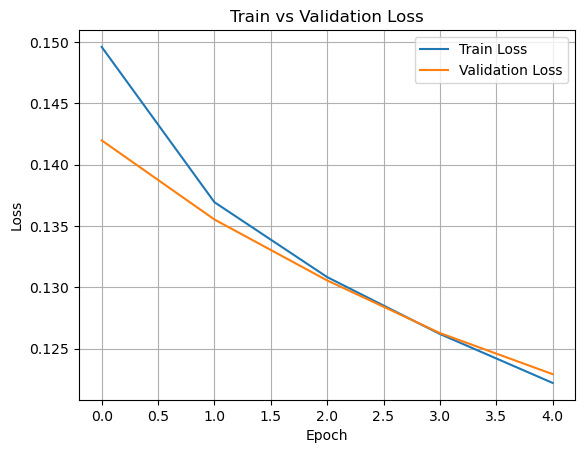

In [ ]:
df = pd.read_csv("datos/Resilience_CleanOnly_v1_PREPROCESSED_v2.csv", encoding="latin1")
sizes = [len(df.columns)-1,16,1]
output_activation = nn.Sigmoid
intermediate_activation = nn.ReLU
normalize_output = True
loss = nn.MSELoss
name = f"model_{sizes}_output_{output_activation.__name__}_intermediate_{intermediate_activation.__name__}_normalized_data_{normalize_output}_loss_{loss.__name__}"

comparison_table = pd.read_csv("results/comparison_table.csv")

#probabilities = df["weight"]


weight_path = f"results/{name}.pth" if os.path.exists(f"results/{name}.pth") else None
logger = Logger("results/logs")

train_df, val_df, test_df = stratified_split(df)

train_data = CustomDataset(train_df, normalize_output)
val_data = CustomDataset(val_df, normalize_output)

test_data = CustomDataset(test_df, normalize_output)
train_loader = DataLoader(train_data, batch_size=5, shuffle=True)
val_loader = DataLoader(val_data, batch_size=5, shuffle=False)
test_loader = DataLoader(test_data, batch_size=5, shuffle=False)



model = Model(weight_path,description=name, hidden_sizes=sizes, output_activation=output_activation)  
criterion = loss()
optimizer = optim.Adagrad(model.parameters(), lr=0.01)

trained_model, val_loss = train_model(model, train_loader, val_loader, criterion, optimizer, 5, logger)

torch.save(trained_model.state_dict(), f"results/{name}.pth")


#Metricas

metricas_train = evaluar_modelo(trained_model, train_loader , normalize_output)
metricas_val = evaluar_modelo(trained_model, val_loader , normalize_output)

new_row = {
    "name": name,
    "loss": val_loss,

    "train_mse": metricas_train['mse'],
    "train_rmse": metricas_train['rmse'],
    "train_mae": metricas_train['mae'],
    "train_smape": metricas_train['smape'],

    "val_mse": metricas_val['mse'],
    "val_rmse": metricas_val['rmse'],
    "val_mae": metricas_val['mae'],
    "val_smape": metricas_val['smape'],    
}

comparison_table = pd.concat([comparison_table, pd.DataFrame([new_row])], ignore_index=True)
comparison_table.to_csv("results/comparison_table.csv", index=False)